# Mushrooms Classification: Predicting the Edibility of Mushrooms

## Author: Elom Gbogbo

### Date: April 6th, 2025

#### Introduction: Using the Mushroom Classification Dataset from UCI, I built a classification model with the objective of determining whether a mushroom is edible or poisonous based on physical characteristics. The dataset contains over 8,000 samples with 22 categorical features. After building a classification model to determine the objective, I compare an alternative model to compare the difference in models.

## Imports

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report, root_mean_squared_error, mean_absolute_error, r2_score

## Section 1. Import and Inspect the Data

### 1.1 Load the Dataset and display the first 10 rows

In [205]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data" 

column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv(url, header=None, names=column_names)

In [206]:
class_map = {
    'e': 'edible',
    'p': 'poisonous'
}

cap_shape_map = {
    'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'
}

cap_surface_map = {
    'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'
}

cap_color_map = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green',
    'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'
}

bruises_map = {
    't': 'bruises', 'f': 'no'
}

odor_map = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy',
    'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}

gill_attachment_map = {
    'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'
}

gill_spacing_map = {
    'c': 'close', 'w': 'crowded', 'd': 'distant'
}

gill_size_map = {
    'b': 'broad', 'n': 'narrow'
}

gill_color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray',
    'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red',
    'w': 'white', 'y': 'yellow'
}

stalk_shape_map = {
    'e': 'enlarging', 't': 'tapering'
}

stalk_root_map = {
    'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal',
    'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'
}

stalk_surface_map = {
    'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'
}

stalk_color_map = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'
}

veil_type_map = {
    'p': 'partial', 'u': 'universal'
}

veil_color_map = {
    'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'
}

ring_number_map = {
    'n': 'none', 'o': 'one', 't': 'two'
}

ring_type_map = {
    'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large',
    'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'
}

spore_print_color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'
}

population_map = {
    'a': 'abundant', 'c': 'clustered', 'n': 'numerous',
    's': 'scattered', 'v': 'several', 'y': 'solitary'
}

habitat_map = {
    'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths',
    'u': 'urban', 'w': 'waste', 'd': 'woods'
}

In [207]:
df['class'] = df['class'].map(class_map)
df['cap-shape'] = df['cap-shape'].map(cap_shape_map)
df['cap-surface'] = df['cap-surface'].map(cap_surface_map)
df['cap-color'] = df['cap-color'].map(cap_color_map)
df['bruises'] = df['bruises'].map(bruises_map)
df['odor'] = df['odor'].map(odor_map)
df['gill-attachment'] = df['gill-attachment'].map(gill_attachment_map)
df['gill-spacing'] = df['gill-spacing'].map(gill_spacing_map)
df['gill-size'] = df['gill-size'].map(gill_size_map)
df['gill-color'] = df['gill-color'].map(gill_color_map)
df['stalk-shape'] = df['stalk-shape'].map(stalk_shape_map)
df['stalk-root'] = df['stalk-root'].map(stalk_root_map)
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map(stalk_surface_map)
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map(stalk_surface_map)
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map(stalk_color_map)
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map(stalk_color_map)
df['veil-type'] = df['veil-type'].map(veil_type_map)
df['veil-color'] = df['veil-color'].map(veil_color_map)
df['ring-number'] = df['ring-number'].map(ring_number_map)
df['ring-type'] = df['ring-type'].map(ring_type_map)
df['spore-print-color'] = df['spore-print-color'].map(spore_print_color_map)
df['population'] = df['population'].map(population_map)
df['habitat'] = df['habitat'].map(habitat_map)

In [208]:
print(df.head())

       class cap-shape cap-surface  ... spore-print-color population  habitat
0  poisonous    convex      smooth  ...             black  scattered    urban
1     edible    convex      smooth  ...             brown   numerous  grasses
2     edible      bell      smooth  ...             brown   numerous  meadows
3  poisonous    convex       scaly  ...             black  scattered    urban
4     edible    convex      smooth  ...             brown   abundant  grasses

[5 rows x 23 columns]


### 1.2 Check for missing values and display summary statistics

In [209]:
# Check for missing values
print(df.isnull().sum())

# Display summary statistics
df.info()

display(df.describe())


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape              

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Reflection 1: What do you notice about the dataset? Are there any data issues?
- There are 8124 records and 22 features. The dataset uses abbreviations or letters to describe the data in the columns. I changed the dataset so it has the full description of the categories. 

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

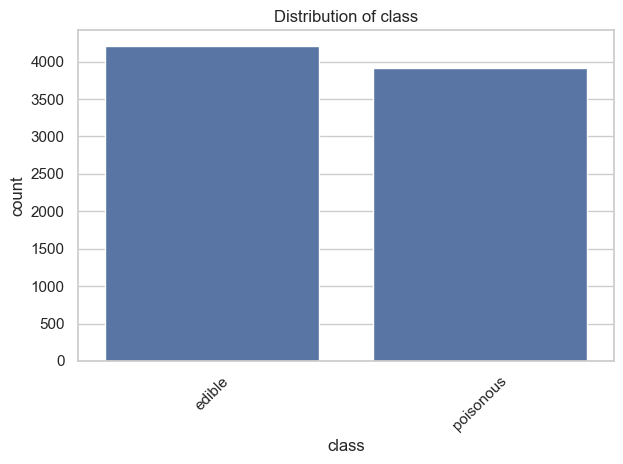

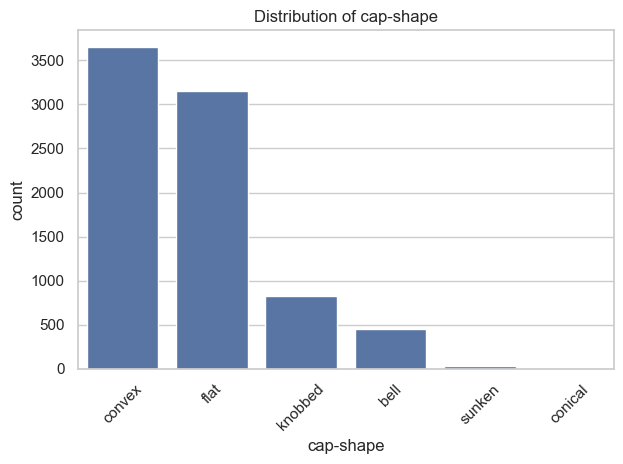

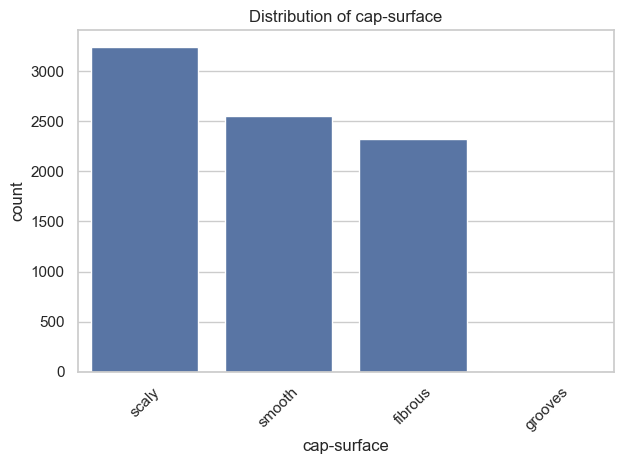

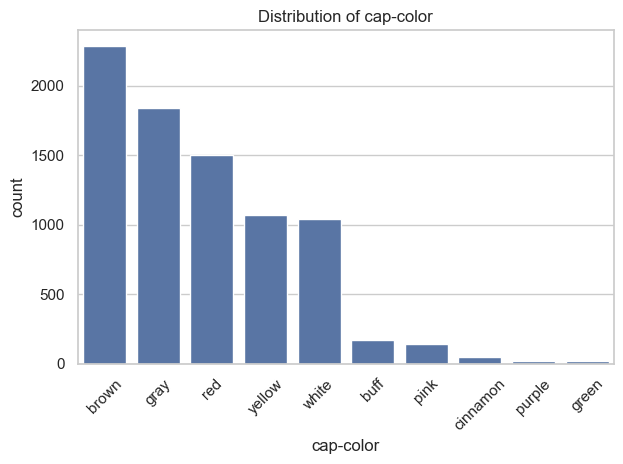

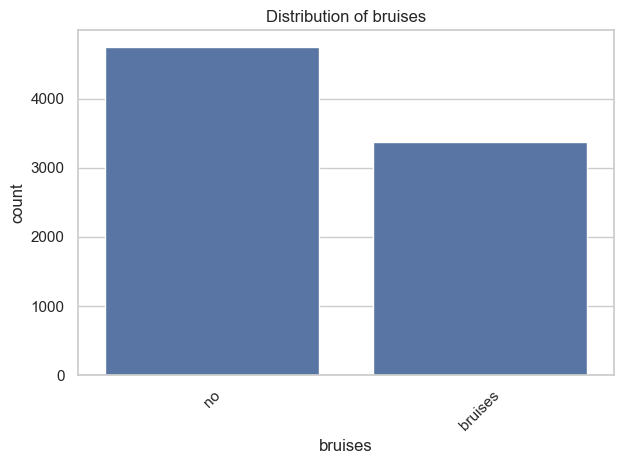

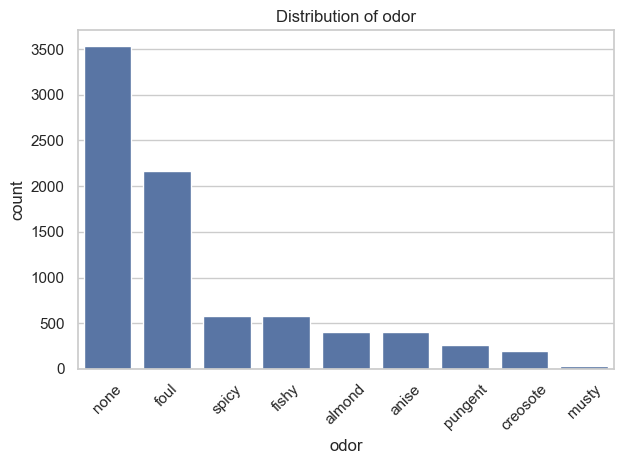

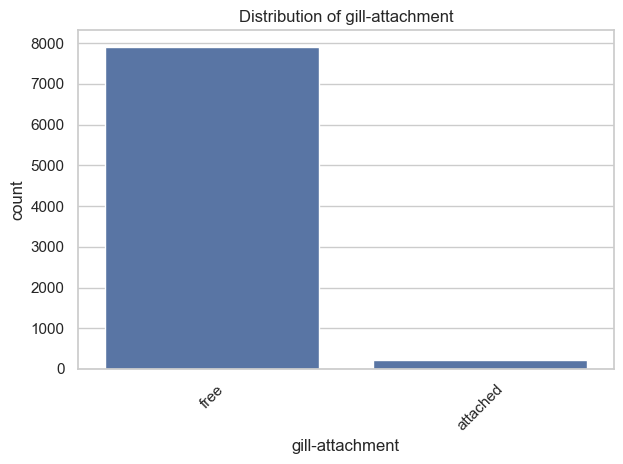

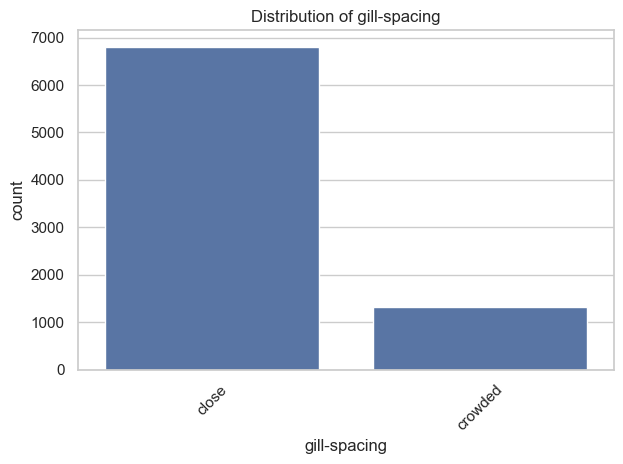

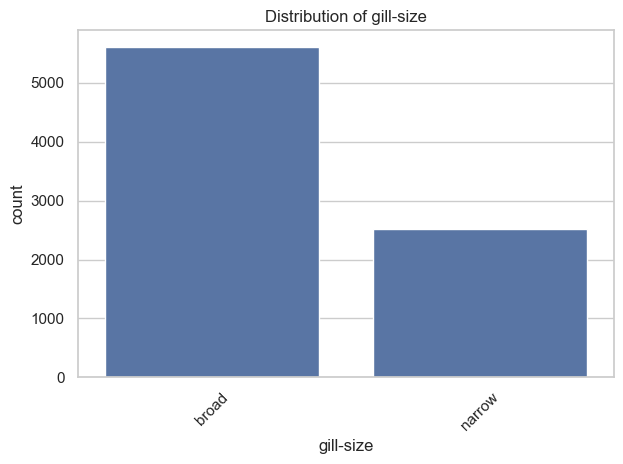

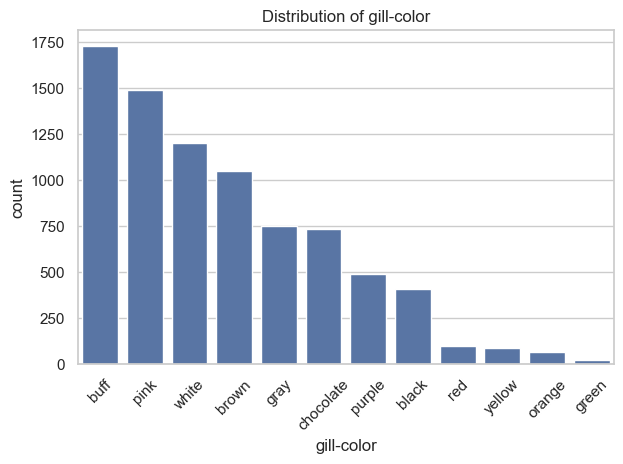

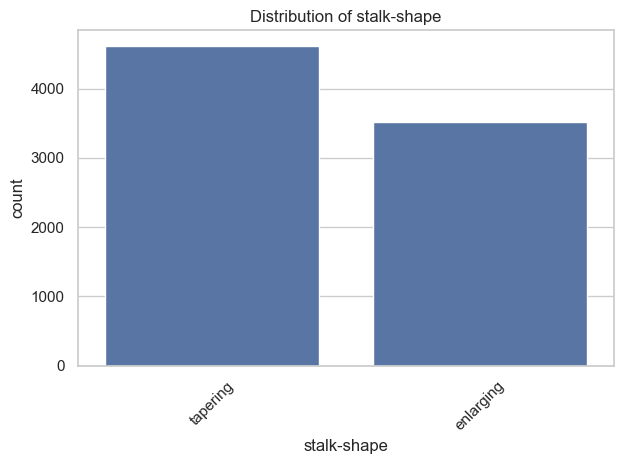

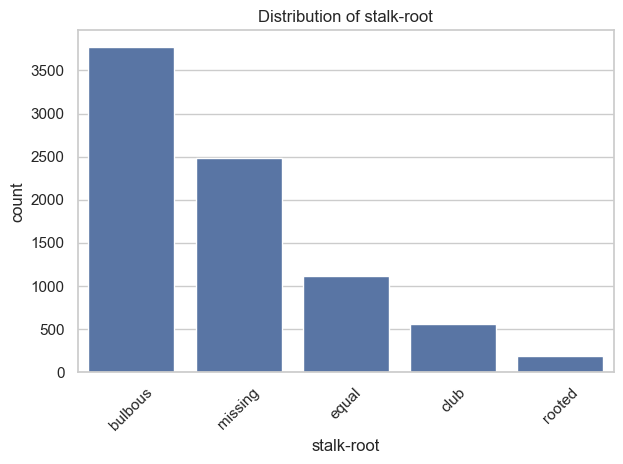

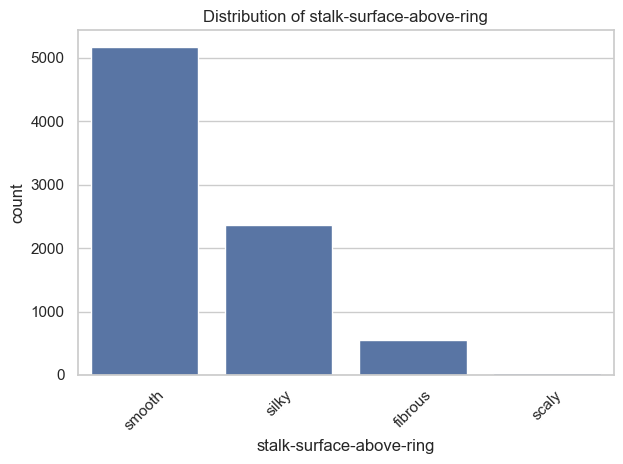

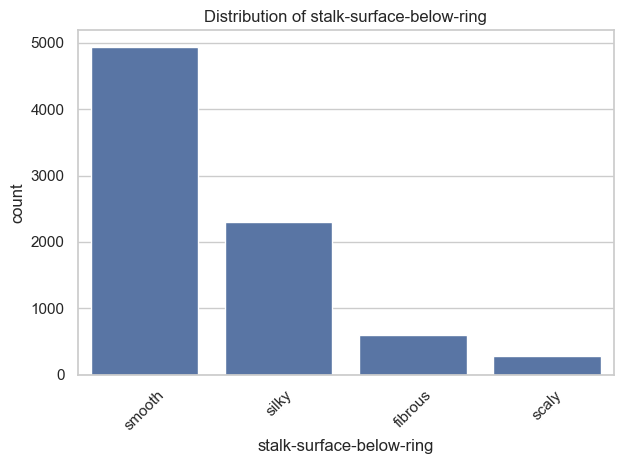

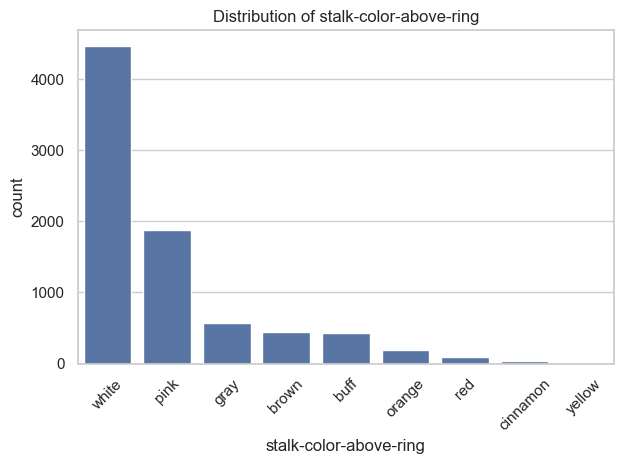

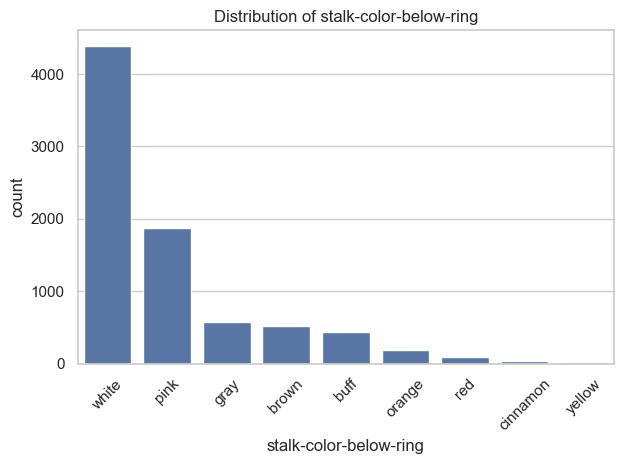

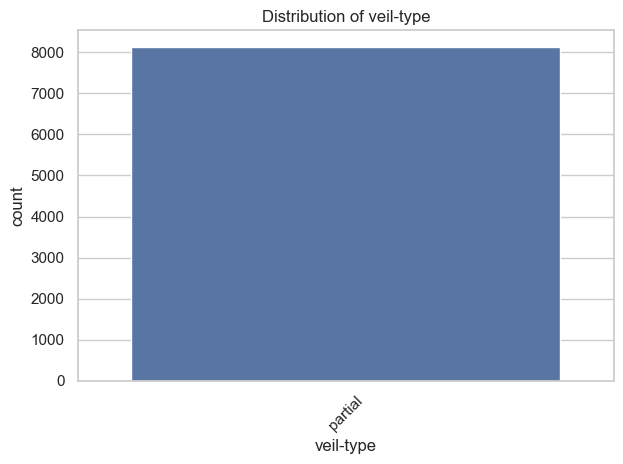

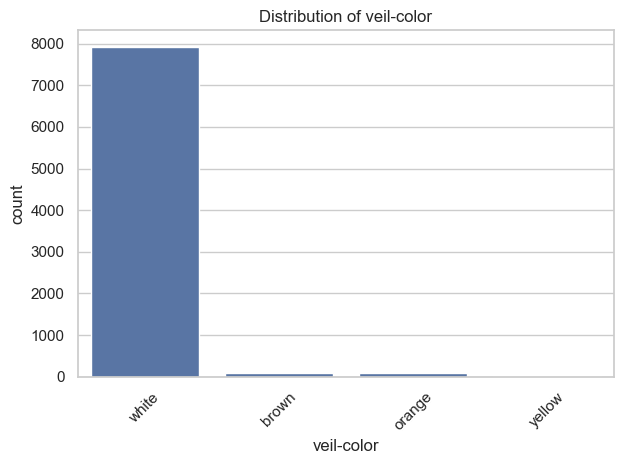

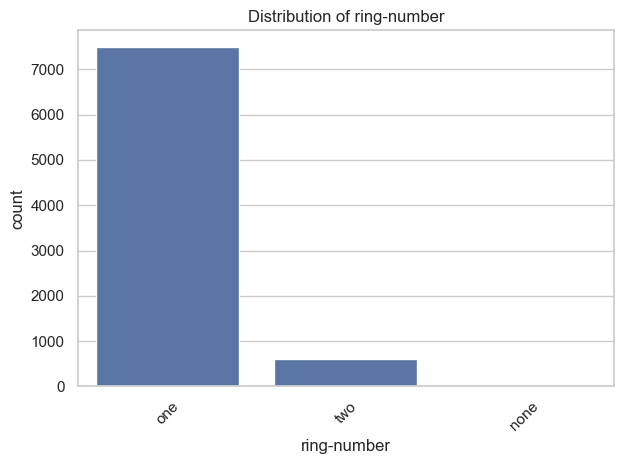

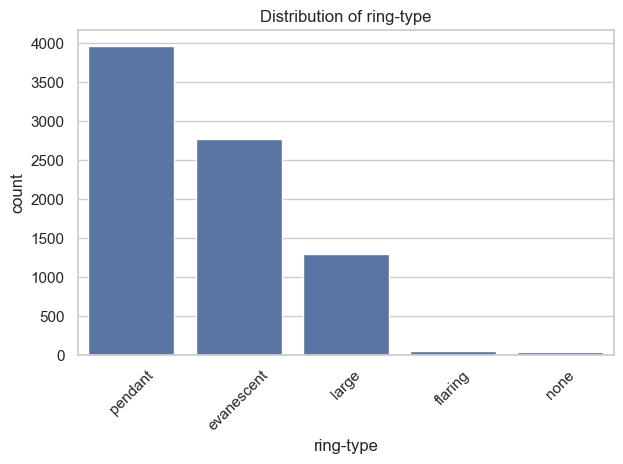

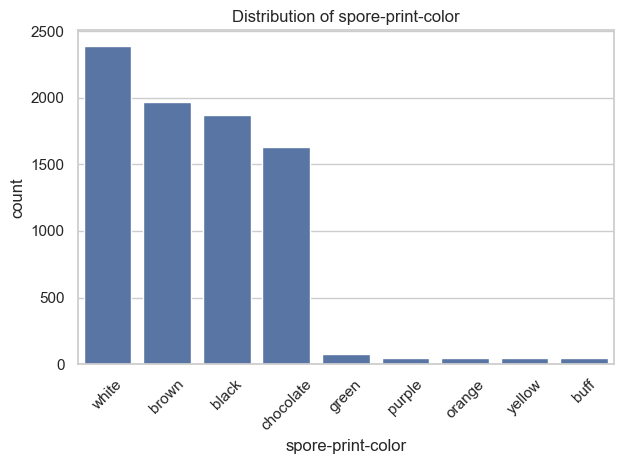

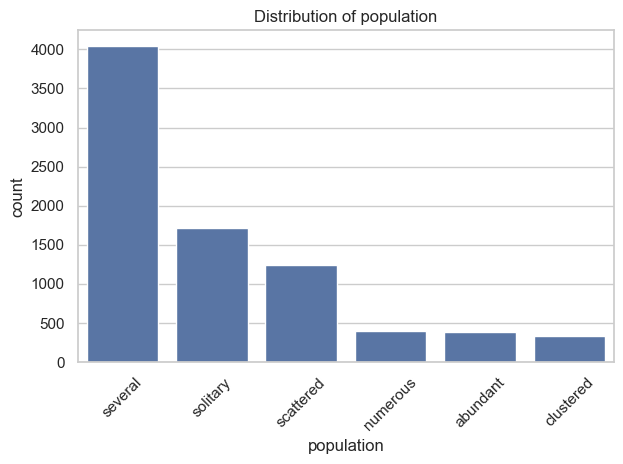

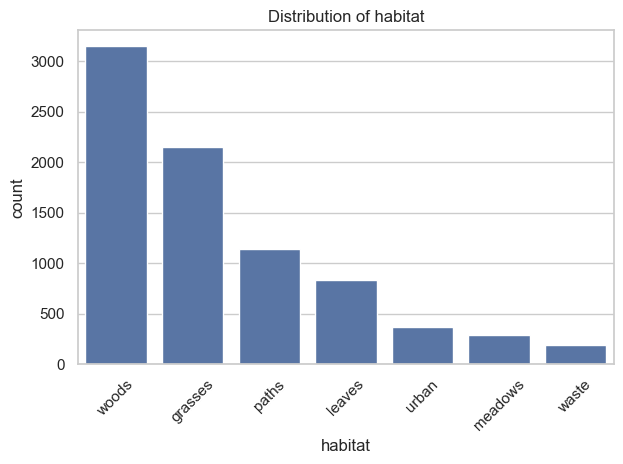

In [210]:
# Plot count plots for each categorical feature
categorical_columns = df.columns

for col in categorical_columns:
    sns.countplot(data=df, x=col, legend=False, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 2.2 Handle Missing Values and Encode Features

In [211]:
(df == '?').sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [212]:
most_common_stalk_root = df['stalk-root'].mode()[0]
df['stalk-root'] = df['stalk-root'].replace('?', most_common_stalk_root)


In [213]:
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?
- For the most part, the features are well-distributed in multiple categories. There are some features that only have one category or is dominated by one category. There are not many outliers to note. In the "stalk-root" column, I noticed there were "?" in place for missing data, so I imputed the missing values to that column using mode. 

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

In [214]:
target = 'class'
features = ['odor', 'spore-print-color']

### 3.2 Define X and y

In [215]:
X = df[features]
y = df[target]

Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?
- I chose these features because I believe that both odor and color are the first that would be noticeable and apparent when examining mushrooms. I believe the selections of features will strong predictors to determine whether a mushroom is either edible or poisonous.


## Section 4. Train a Model - Decision Tree

### 4.1 Split the Data

In [217]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4.2 Train Model using Scikit-Learn model.fit

In [218]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### 4.3 Evaluate Model Performance


Classification Report:
               precision    recall  f1-score   support

      Edible       0.99      1.00      0.99       842
   Poisonous       1.00      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



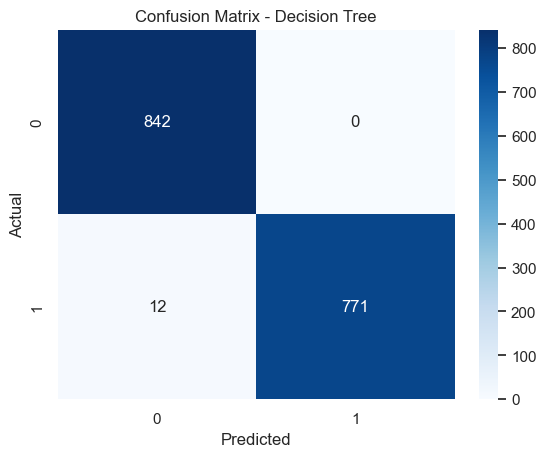

In [222]:
y_pred = dt_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


Reflection 4: How well did the model perform? Any surprises in the results?
- The decision tree performed extremely well with very high accuracy. I do not believe these results are surprising. This indicates that odor and color have great predictors. 

## Section 5. Improve the Model or Try Alternates (Random Forest)

### 5.1 Train an alternative classifier

In [223]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5.2 Evaluate Model Performance


Classification Report:
               precision    recall  f1-score   support

      Edible       0.99      1.00      0.99       842
   Poisonous       1.00      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



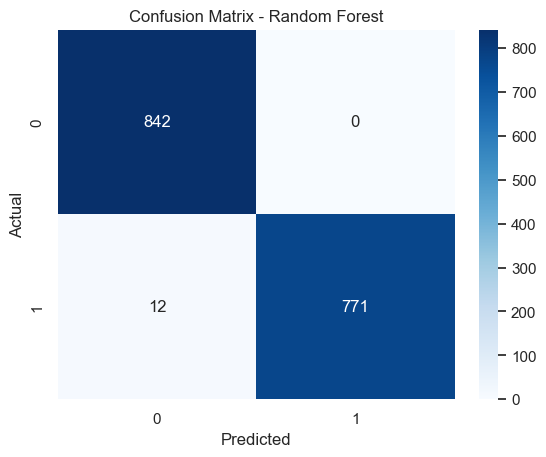

In [225]:
rf_pred = rf_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, rf_pred, target_names=['Edible', 'Poisonous']))

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?
- Both the decision tree and random forest model performed well with comparable results and high accuracy. Random forest might be more effective because this model reduces overfitting more compared to decision trees.

## Section 6. Final Thoughts & Insights

6.1 Summarize findings.
- The decision tree and random forest demonstrate great performance with the accuracy of both models near 99%.  

6.2 Discuss challenges faced.
- There were not too many challenges when building these classification models. One problem with the dataset is that input of "?" to indicate a missing value and it would not detect. I was able to impute the values and not drop the column. 

6.3 If you had more time, what would you try next?
- I would try some other features to predict the selected target. I would also selected another target to see if I could use different features to predict the target. I would like to use other models and highlight the difference in each model as well. 

Reflection 6: What did you learn from this project? I learned how to structure a notebook and build a classification model from scratch using different data. This project allowed me to apply and understand classification models using real-world data. 